# Looking At Median Household Income in the City of Los Angeles

For our group project, I wanted to take a closer look at median household income (MHI) of each census tract in the city of Los Angeles. LA is known for its extreme socioeconomic inequality, from the ostentatious affluence along the foothills of the Santa Monica Mountains to the abject poverty of many neighborhoods in its valley basins. I want to get a better sense of which areas are generally more well-off and vice versa. In later weeks, I will compare this to existing bike infrastructure and determine whether there is a significant correlation between a neighborhood's household wealth to the existence of public bikeways on its streets. Note that the data I am pulling is from 2019, which will be important when we compare this to statewide and national data.

## Importing libraries and GEOJSON file
I first import the following libraries: panda for running data commands, geopanda for analyzing geospatial data, contextily for its basemaps, and matplotlib.pyplot to plot the final map.

In [2]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


I find the data of median household income for all census tracts within the city of Los Angeles from [CensusExplorer.org](https://censusreporter.org/data/table/?table=B19013&geo_ids=16000US0644000,140|16000US0644000&primary_geo_id=16000US0644000) and upload the GEOJSON file into my Jupyter notebook. Afterwards I load the datafile onto python. As the GEOJSON file is located in the same folder as this python file (/up206a_Monica-Bailey/GroupAssignments/), I simply need to put in the name of the file. I use a few commands to check if the data is loading properly.

In [6]:
mhi = gpd.read_file('acs2019_5yr_B19013_14000US06037222001.geojson')

In [9]:
mhi.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [10]:
mhi.tail()

,geoid,name,B19013001,"B19013001, Error",geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",62142.0,452.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


By looking at the tail end of the data, we see that the last row 1004 of the dataset is the entire city of Los Angeles. Keeping this in mind, we'll have to get rid of that later.

<AxesSubplot:>

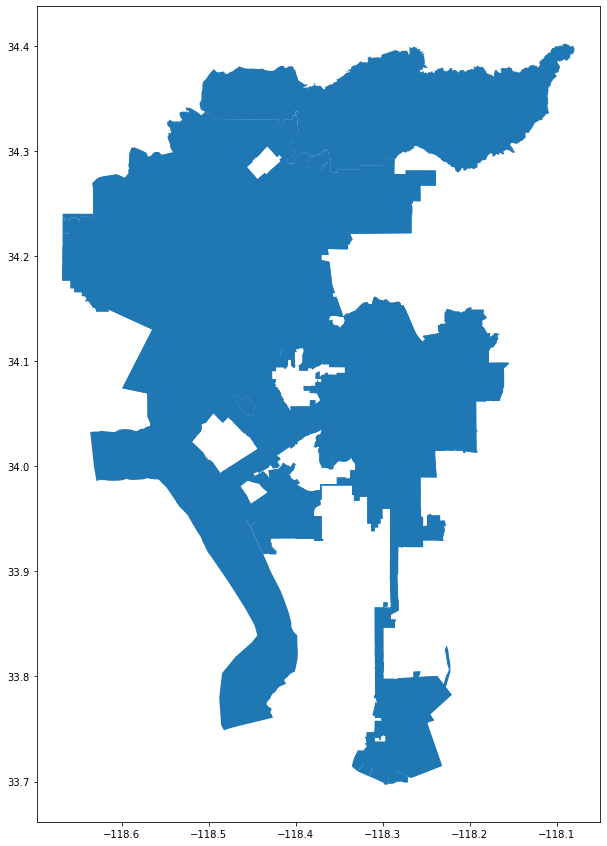

In [13]:
mhi.plot(figsize=(15,15))

In [14]:
mhi.sample

<bound method NDFrame.sample of                    geoid                                   name  B19013001  \
0     14000US06037101110  Census Tract 1011.10, Los Angeles, CA    63534.0   
1     14000US06037101122  Census Tract 1011.22, Los Angeles, CA    90389.0   
2     14000US06037101210  Census Tract 1012.10, Los Angeles, CA    44083.0   
3     14000US06037101220  Census Tract 1012.20, Los Angeles, CA    43713.0   
4     14000US06037101300     Census Tract 1013, Los Angeles, CA    81776.0   
...                  ...                                    ...        ...   
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA        NaN   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA        NaN   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA        NaN   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA        NaN   
1004      16000US0644000                        Los Angeles, CA    62142.0   

      B19013001, Error         

It looks like there are 1004 census tracts in the City of LA. (rows 0 to 1003). Remember, row 1004 is a "summary row" that shows the MHI for the entire city. For now, let's look at the data types of this file and see the FIPS (geoid) code of the census tracts. 

In [15]:
mhi.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1005 non-null   object  
 1   name              1005 non-null   object  
 2   B19013001         993 non-null    float64 
 3   B19013001, Error  990 non-null    float64 
 4   geometry          1005 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 39.4+ KB


In [16]:
mhi.geoid.head()

0    14000US06037101110
1    14000US06037101122
2    14000US06037101210
3    14000US06037101220
4    14000US06037101300
Name: geoid, dtype: object

## Deleting the city row
Let's now delete the row 1004, the row summarizing the entire city of LA. We don't want this in the dataset because we're looking at the MHI of individual census tracts *within* the city.

In [67]:
mhi.tail()

,geoid,name,Median Household Income,geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",62142.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [68]:
mhi = mhi.drop([1004])

In [71]:
# checking the tail to confirm row 1004 has been dropped
mhi.tail()

,geoid,name,Median Household Income,geometry
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",150250.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


## Dropping and renaming columns
Next, I will create a list of columns to keep, getting rid of the error column. I will then confirm to see if the error column is removed.

In [17]:
list(mhi)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

In [18]:
columns_to_keep = ['geoid', 'name', 'B19013001', 'geometry']

In [19]:
mhi = mhi[columns_to_keep]

In [20]:
#checking that the error column is removed
mhi.head()

,geoid,name,B19013001,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Now I will rename 'B19013001' column to 'Median Household Income' to reflect its name.

In [23]:
mhi.columns = ['geoid', 'name', 'Median Household Income', 'geometry']

In [24]:
mhi.head()

,geoid,name,Median Household Income,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


## Checking the data is correct
Let's do a data check by obtaining a random sample.

In [25]:
random_tract = mhi.sample()
random_tract

,geoid,name,Median Household Income,geometry
11,14000US06037103102,"Census Tract 1031.02, Los Angeles, CA",75276.0,"MULTIPOLYGON (((-118.31575 34.26059, -118.3157..."


In [29]:
random_tract.iloc[0]['Median Household Income']

75276.0

# Simple stats and plots
Now that we have the median household income loaded, let's see what the mean and median is and look at some statistics and plots.

In [30]:
mhi['Median Household Income'].mean()

68197.41087613293

In [31]:
mhi['Median Household Income'].median()

58576.0

In [32]:
mhi['Median Household Income'].describe()

count       993.000000
mean      68197.410876
std       36624.331957
min        9191.000000
25%       42766.000000
50%       58576.000000
75%       85262.000000
max      250001.000000
Name: Median Household Income, dtype: float64

<AxesSubplot:ylabel='Frequency'>

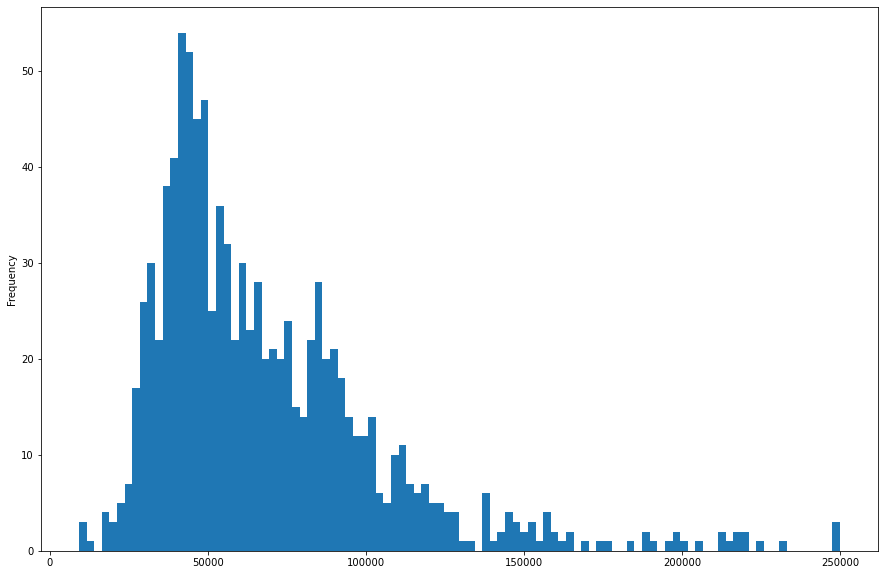

In [41]:
mhi['Median Household Income'].plot.hist(figsize=(15,10),bins=100)

Seeing the mean census tract MHI is higher than the median MHI, it looks like there are outlying census tracts with much higher MHI than a normal distribution would suggest. Plotting the data confirms LA contains outlying census tracts on the high end of MHI, with a positively-skewed distribution shown in the histogram. The highest frequency of census tract MHI is around USD50,000, but there are smaller frequencies of much higher MHI, with the highest at almost USD250,000 MHI.

## Sorting
Now I'm curious where are the census tracts with the highest MHIs, and what those values are.

In [47]:
mhi_sorted = mhi.sort_values(by='Median Household Income',ascending = False)

In [48]:
mhi_sorted[['geoid','Median Household Income']].head(10)

,geoid,Median Household Income
831,14000US06037262303,250001.0
832,14000US06037262400,250001.0
340,14000US06037141700,250001.0
994,14000US06037980019,231250.0
833,14000US06037262501,224962.0
839,14000US06037264000,220417.0
338,14000US06037141500,219698.0
827,14000US06037262100,217462.0
838,14000US06037262802,217292.0
829,14000US06037262301,215750.0


<AxesSubplot:>

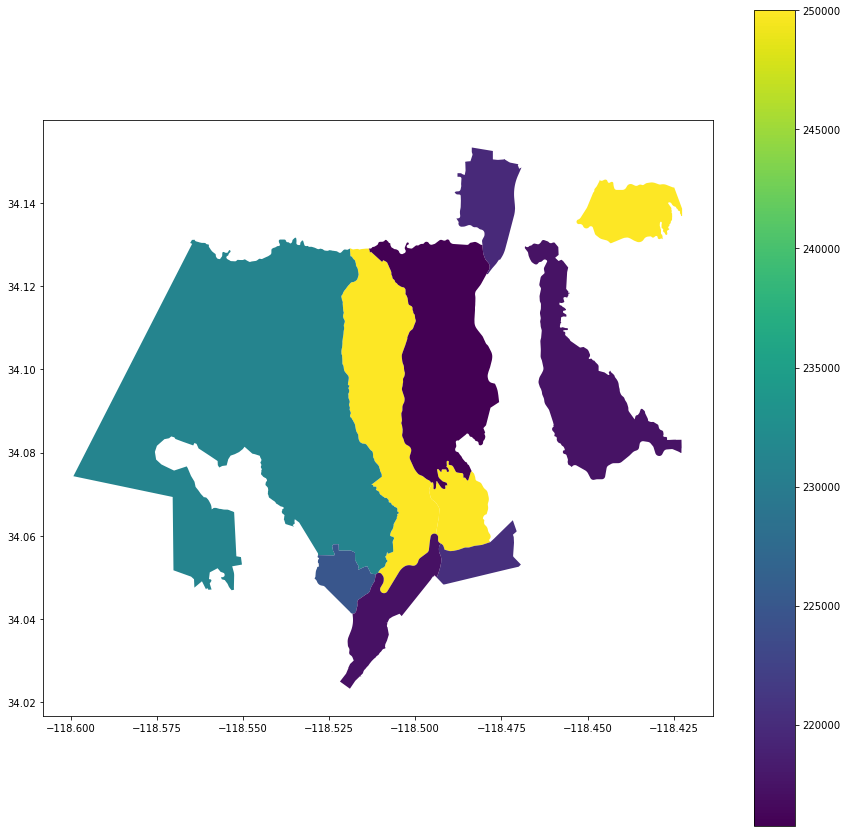

In [52]:
mhi_sorted.head(10).plot(figsize=(15,15), column='Median Household Income', legend=True)

If I'm not mistaken, these census tracts are the foothills of Bel-Air and Pacific Palisades just a few minutes' drive from UCLA.

## Filtering and subsetting data
According to the [US Census Bureau](https://www.census.gov/library/publications/2021/demo/p60-273.html), the median household income of the US in 2019 was USD 69,560. Let's filter the data to see which LA census tracts are lower than the nationwide MHI.

In [81]:
mhi[mhi['Median Household Income']<69560]

,geoid,name,Median Household Income,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
8,14000US06037102105,"Census Tract 1021.05, Los Angeles, CA",57614.0,"MULTIPOLYGON (((-118.35307 34.20878, -118.3530..."
16,14000US06037104105,"Census Tract 1041.05, Los Angeles, CA",54960.0,"MULTIPOLYGON (((-118.41034 34.27466, -118.4099..."
...,...,...,...,...
985,14000US06037297601,"Census Tract 2976.01, Los Angeles, CA",55246.0,"MULTIPOLYGON (((-118.29287 33.70296, -118.2928..."
986,14000US06037297602,"Census Tract 2976.02, Los Angeles, CA",64873.0,"MULTIPOLYGON (((-118.29286 33.72110, -118.2928..."
987,14000US06037701100,"Census Tract 7011, Los Angeles, CA",45536.0,"MULTIPOLYGON (((-118.46889 34.06587, -118.4687..."
991,14000US06037980010,"Census Tract 9800.10, Los Angeles, CA",19167.0,"MULTIPOLYGON (((-118.25165 34.08038, -118.2515..."


As we can see, despite the city of LA having some extremely affluent census tracts, a majority of LA census tracts have MHI below the national MHI. The median MHI in LA census tracts reflects this, as it is lower than the national average.

In [82]:
mhi['Median Household Income'].median()

58398.5

In 2019, the federal poverty level for a family of four was USD 25,750 as obtained from the [US Department of Health and Human Services](https://aspe.hhs.gov/topics/poverty-economic-mobility/poverty-guidelines/prior-hhs-poverty-guidelines-federal-register-references/2019-poverty-guidelines). Let's see how many LA census tracts fall below this amount, display the table, and visualize the census tracts in a plot.

In [84]:
mhi_below_pov = mhi[mhi['Median Household Income']<25750]

In [85]:
print('There are ' + str(len(mhi_below_pov)) + ' census tracts with a median household income below the federal poverty guideline for a family of four.')

There are 22 census tracts with a median household income below the federal poverty guideline for a family of four.


In [87]:
mhi_below_pov[['geoid','Median Household Income']]

,geoid,Median Household Income
534,14000US06037206050,23380.0
535,14000US06037206200,23515.0
536,14000US06037206300,9191.0
544,14000US06037207502,18594.0
676,14000US06037221401,24904.0
682,14000US06037221810,25357.0
683,14000US06037221820,12235.0
684,14000US06037221900,17237.0
691,14000US06037222700,9632.0
698,14000US06037224420,24878.0


<AxesSubplot:>

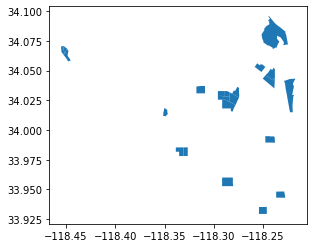

In [88]:
mhi_below_pov.plot()

This plot is a bit unclear without a basemap to show where these census tracts are in relation to the entire city of LA. With my background knowledge of LA neighborhoods, it looks most of these census tracts are in Central LA surrounding Downtown and into South LA. In this last section, we will load a basemap and create more visual maps to determine if my guess is correct.

## Mapping the final data analysis with basemap
First, let's visualize the MHI of every census tract in the whole city of LA. We'll use user defined brackets to highlight in purple the census tracts with a MHI lower than USD 25750.

<AxesSubplot:>

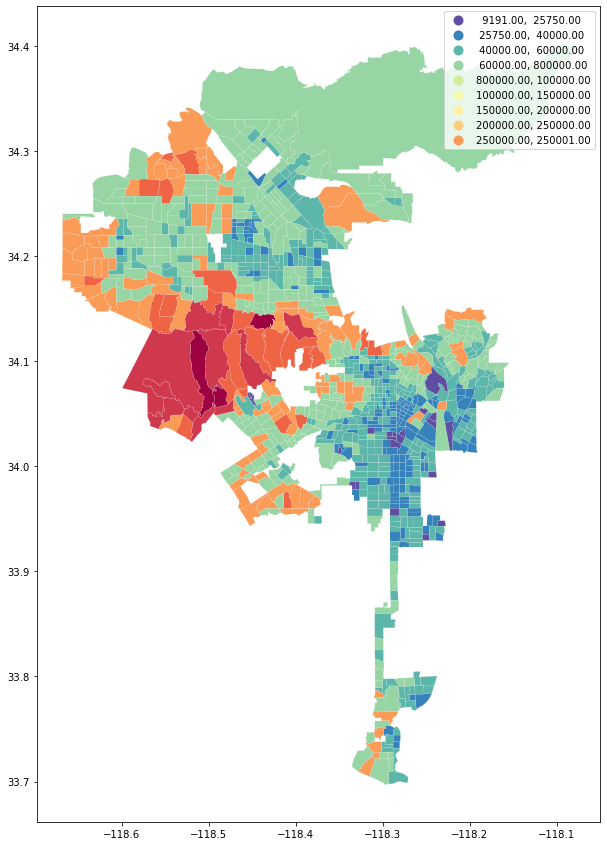

In [101]:
mhi.plot(figsize=(15,15), 
         column='Median Household Income', 
         cmap = 'Spectral_r', 
         legend = True, 
         scheme = 'user_defined', 
        classification_kwds={'bins':[25750,40000,60000,800000,100000,150000,200000,250000]}, 
        edgecolor = 'white', 
        linewidth = 0.1, 
        )